[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\assem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\assem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

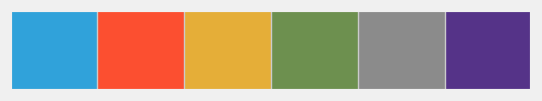

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import squarify
plt.style.use('fivethirtyeight')
five_thirty_eight = ['#30a2da', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#553388']
sns.set_palette(five_thirty_eight)
sns.palplot(sns.color_palette())

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

In [2]:
stop_words = set(stopwords.words('english'))
punctuations = string.punctuation

In [3]:
jobs_df = pd.read_csv('jobs_df.csv', encoding='latin-1')

## Data Cleaning

In [4]:
def remove_stopwords(text):
    """
    This function filteres strings from stopwords and punctuations.
    """
    text = text.lower()
    text = text.replace('â', '').replace('ã', '')  # Remove some observed strange characters
    text = text.replace('\x82', '').replace('\x83', '').replace('\x93', '')
    text = text.replace('\'s', '').replace('©', '').replace('¢', '')
    word_tokens = word_tokenize(text)
    filt_list = [word for word in word_tokens if (word not in stop_words) and (word not in punctuations)]
    
    return filt_list

In [5]:
def standardize_job_titles(df, col):
    """
    This function performs some standardization processes on the 'job_title' columns.
    """
    # Converts to lowercase
    df[col] = df[col].str.lower()
    
    # Remove everything within parentheses and square brackets, or after dashes and pipes
    df[col] = df[col].str.replace(r'[-|I].*|\(.*\)', '', regex=True)
    
    # Remove single characters and numbers from the end of the title
    df[col] = df[col].str.replace(r'\s+[A-Za-z0-9]$', '', regex=True)
    
    # Remove extra whitespaces
    df[col] = df[col].str.replace(r'\s+', ' ', regex=True).str.strip()

In [6]:
def standardize_comp_names(df, col):
    """
    This function unifies the names of some companies that are present more than once with different names.
    """
    df[col] = df[col].str.replace('Pfizer, Inc.', 'Pfizer Inc')
    df[col] = df[col].str.replace('SSC Egypt', 'SSC')
    df[col] = df[col].str.replace('Dell Inc.', 'Dell')
    df[col] = df[col].str.replace('Aramex International', 'Aramex')
    df[col] = df[col].str.replace('Giza Systems Group', 'GIZA Systems')
    df[col] = df[col].str.replace('AUMET Inc.', 'Aumet, Inc')
    df[col] = df[col].str.replace('Arrow Electronics', 'Arrow').replace('Arrow, Inc', 'Arrow')

In [7]:
def df_cleaning(df):
    """
    This function performs some data cleaning processes on dataframes.
    """
    # Dropping duplicated values (using the url column as a PK)
    df.drop_duplicates(subset='job_url', inplace=True)
    
    # Standardizing company names
    standardize_comp_names(df, 'company')
    
    # Standardizing job titles
    standardize_job_titles(df, 'job_title')
    
    # Since a lot of people call all the cities in Cairo and Giza just 'Cairo',
    # but still others don't. Therefore, it's better to standardize the name
    df.location = df.location.str.replace('Giza, Cairo', 'Cairo, Egypt')
    
    # Filtering job requirements from stopwords
    df.job_desc = df.job_desc.apply(remove_stopwords)

In [8]:
df_cleaning(jobs_df)

C:\Users\assem\AppData\Local\Temp\ipykernel_10416\2143922545.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace('Pfizer, Inc.', 'Pfizer Inc')
C:\Users\assem\AppData\Local\Temp\ipykernel_10416\2143922545.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace('Dell Inc.', 'Dell')
C:\Users\assem\AppData\Local\Temp\ipykernel_10416\2143922545.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace('AUMET Inc.', 'Aumet, Inc')


Since search engines are not perfect, our job search will certainly have multiple unwanted jobs from various business, software, and engineering fields. Therefore, we need to filter the dataset based on the job title. <br>
Job titles were subjectively classified based on our observation of job requirements.

In [9]:
da_titles = ['data analyst', 'business analyst', 'bi analyst', 'bi/data analyst', 'business intelligence analyst',
             'financial analyst', 'bi reporting analyst', 'bi reporting specialist', 'business research analyst',
             'data analyst specialist', 'business intelligence developer', 'business intelligence engineer',
             'bi data management specialist', 'business analyst intern', 'junior data analyst',
             'junior business analyst', 'junior market analyst', 'junior bi & analytics developer',
             'mid-level business analyst', 'senior data analyst', 'senior customer insights analyst',
             'senior business performance analyst', 'senior business analyst', 'senior research analyst',
             'business sr. analyst/ lead', 'data analytic team lead', 'business analytics & insights lead',
             'lead data analyst', 'data analytics manager', 'associate marketing analytics manager',
             'consultant, data quality analytics', 'strategic finance analyst', 'marketing data analytics advisor']

de_titles = ['data engineer', 'junior data engineer', 'data modeler', 'data modeler / mapper',
             'business enablement data engineer', 'big data engineer', 'data architect', 'big data architect',
             'senior data engineer', 'senior big data engineer', 'senior analyst data engineer',
             'senior analyst data engineer', 'senior data warehouse engineer', 'lead data engineer',
             'principal data engineer', 'data engineer advisor', 'data engineer senior advisor', 'staff data engineer',
             'senior data modeler', 'big data tech. lead/principle', 'analytics engineering manager']

ds_titles = ['data scientist', 'data and applied scientist', 'junior data scientist', 'senior data scientist',
             'lead data scientist', 'expert data scientist', 'principal data scientist', 'data science advisor',
             'data science senior advisor', 'staff data scientist', 'head of data science']

ml_titles = ['machine learning', 'machine learning engineer', 'machine learning instructor',
             'senior machine learning engineer', 'senior machine learning/ data science engineer',
             'senior mlops engineer', 'machine learning engineering manager', ]

In [10]:
de_df = jobs_df[jobs_df.job_title.isin(de_titles)]
ds_df = jobs_df[jobs_df.job_title.isin(ds_titles)]
da_df = jobs_df[jobs_df.job_title.isin(da_titles)]
ml_df = jobs_df[jobs_df.job_title.isin(ml_titles)]

In [11]:
de_df.to_csv('de_df.csv', index=False)
ds_df.to_csv('ds_df.csv', index=False)
da_df.to_csv('da_df.csv', index=False)
ml_df.to_csv('ml_df.csv', index=False)

## Data Analysis

### Which data profession has the highest demand?

In [12]:
demand = pd.Series(dtype='object')
titles = [de_df.job_title, ds_df.job_title, da_df.job_title, ml_df.job_title]
demand = pd.concat(titles, axis=0)

In [13]:
def job_demand(df):
    demand = df.shape[0]
    return demand

professions = {'Data Engineering': de_df, 'Data Science': ds_df, 'Data Analysis': da_df, 'ML Engineering': ml_df}
demand = {}
for prof in professions:
    demand[prof] = job_demand(professions[prof])
    
demand = dict(sorted(demand.items(), key=lambda item: item[1], reverse=True))

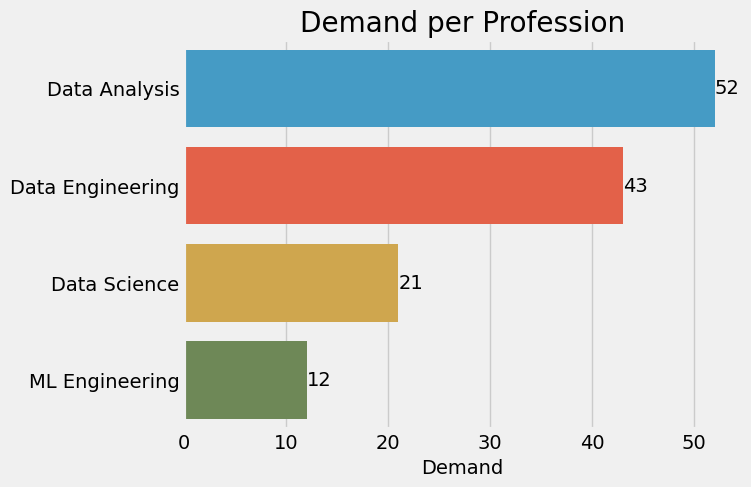

In [14]:
names = list(demand.keys())
values = list(demand.values())

ax = sns.barplot(y=names, x=values)
for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Demand')
plt.title('Demand per Profession')
plt.show()

**Data analysis is the most in-demand profession. This is likely due to the increasing need for businesses to collect and analyze data to make better decisions. Data engineering, data science, and machine learning engineering are also in high demand, as businesses need to build and maintain the infrastructure and tools to collect and analyze data, as well as develop and apply machine learning algorithms to solve business problems.**

### Which companies are hiring the most people in each profession?

In [15]:
def top_comp(df):
    companies = df.company.value_counts()
    top_comp = companies[companies.values > 1]  # Companies with more than one job posting
    df_top_comp = top_comp.index.tolist()
    df_top_values = top_comp.values.tolist()
    
    return df_top_comp, df_top_values

In [16]:
de_top_comp, de_top_values = top_comp(de_df)
ds_top_comp, ds_top_values = top_comp(ds_df)
da_top_comp, da_top_values = top_comp(da_df)
ml_top_comp, ml_top_values = top_comp(ml_df)

In [17]:
def treemap_plot(sizes, labels):
    squarify.plot(sizes=sizes, label=labels, alpha=0.9, color=sns.color_palette(),
                  text_kwargs={'fontsize':10, 'color':'black'}, pad=1)
    plt.axis('off')

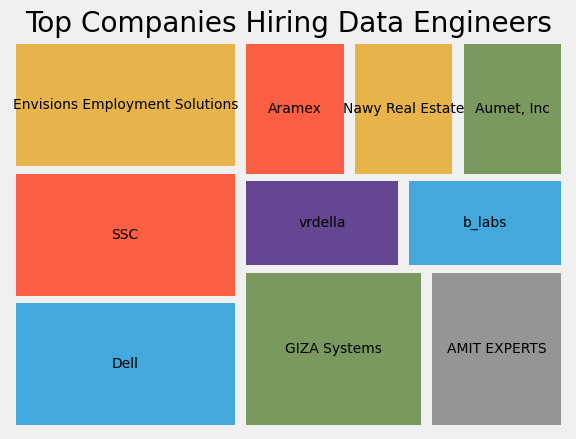

In [18]:
treemap_plot(de_top_values, de_top_comp)
plt.title('Top Companies Hiring Data Engineers')
plt.show()

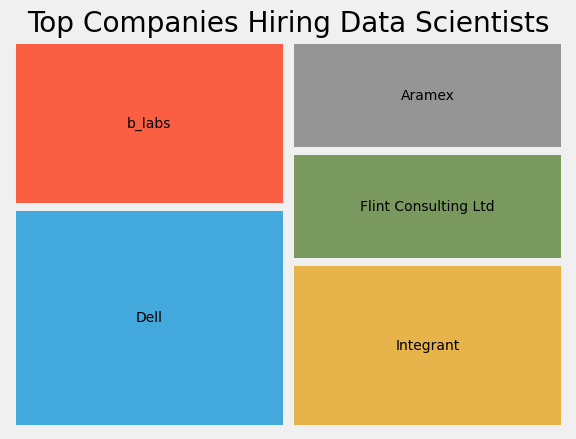

In [19]:
treemap_plot(ds_top_values, ds_top_comp)
plt.title('Top Companies Hiring Data Scientists')
plt.show()

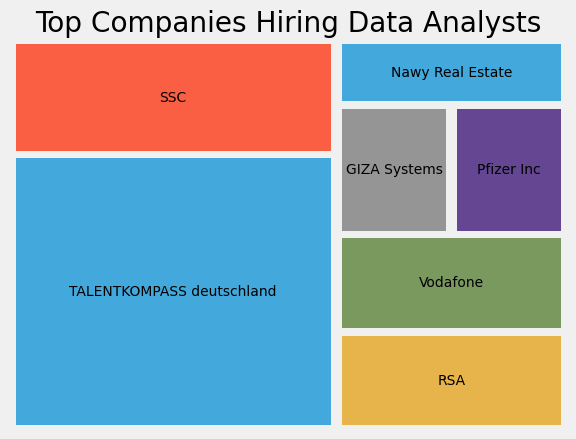

In [20]:
treemap_plot(da_top_values, da_top_comp)
plt.title('Top Companies Hiring Data Analysts')
plt.show()

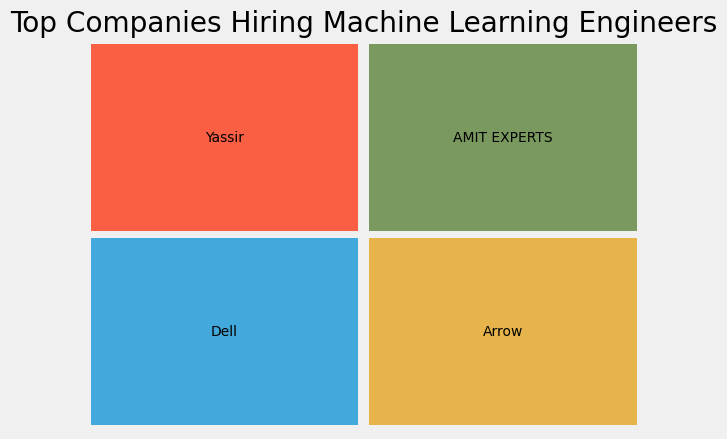

In [21]:
treemap_plot(ml_top_values, ml_top_comp)
plt.title('Top Companies Hiring Machine Learning Engineers')
plt.show()

**Dell seems to be of the top hiring companies for data professionals in Egypt. Other companies like SSC, Aramex, Giza Systems, b-labs, AMIT Experts, and Nawy appear to be hiring across multiple data professions as well.**

### Which cities have the most job openings?

In [22]:
locs_df = pd.Series(dtype='object')
all_locs = [de_df.location, ds_df.location, da_df.location, ml_df.location]
locs_df = pd.concat(all_locs, axis=0)

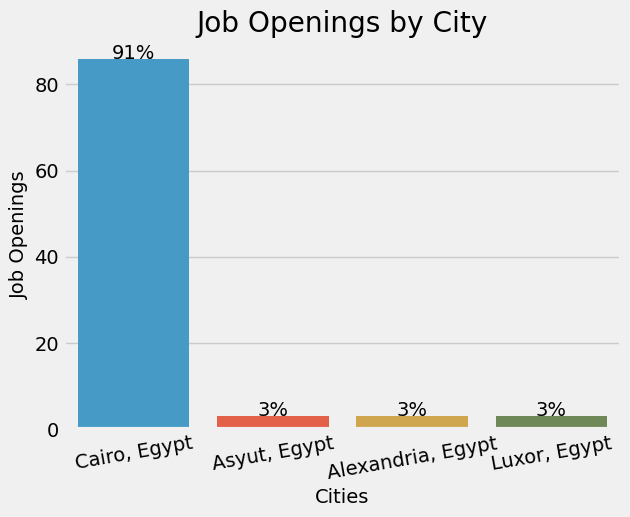

In [23]:
cities = locs_df[locs_df != 'Egypt']

ax = sns.countplot(x=cities, order=cities.value_counts().index)
for p in ax.patches:
    ax.annotate(f'{int(round(p.get_height() / len(cities), 2) * 100)}%',
                ((p.get_x() + (p.get_width() / 2)), p.get_height()),
                ha='center', va='baseline')

plt.xlabel('Cities')
plt.ylabel('Job Openings')
plt.title('Job Openings by City')
plt.xticks(rotation=10)
plt.show()

**Greater Cairo region dominates the job market with 91% of the job openings, indicating that it's the primary hub for data-related professions in Egypt. This is likely due to the fact that Cairo is the largest city in Egypt and home to many of the country's leading businesses. Other cities have minimal or non-existent opportunities in comparison.**

### What is the most common educational background for data professionals in each profession?

In [24]:
def stack_hbar_plot(percentages, categories):
    """
    This function plots stacked horizontal bars.
    """
    labels = list(percentages.keys())
    data = np.array(list(percentages.values()))
    data_cum = data.cumsum(axis=1)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, col in enumerate(categories):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5, label=col)
        ax.bar_label(rects, labels=[f'{int(width*100)}%' if width > 0 else '' for width in widths], label_type='center')

    return fig, ax

In [25]:
def edu_seach(df):
    """
    This function counts the number of jobs requiring different educational backgrounds.
    """
    bsc_count = 0
    msc_count = 0
    phd_count = 0
    bsc_msc_count = 0
    msc_phd_count = 0
    bsc_search = ['bachelor', 'b.sc', 'bs']
    msc_search = 'master'
    phd_search = 'ph.d.'
    
    for desc in df.job_desc:
        if any(search in desc for search in bsc_search) and (msc_search not in desc):
            bsc_count += 1
        elif (msc_search in desc) and all(search not in desc for search in bsc_search) and (phd_search not in desc):
            msc_count += 1
        elif (phd_search in desc) and (msc_search not in desc):
            phd_count += 1
        elif any(search in desc for search in bsc_search) and (msc_search in desc):
            bsc_msc_count += 1
        elif (msc_search in desc) and (phd_search in desc):
            msc_phd_count += 1
    
    unspecified = len(df) - bsc_count - msc_count - phd_count - bsc_msc_count - msc_phd_count
    
    return bsc_count, msc_count, phd_count, bsc_msc_count, msc_phd_count, unspecified

In [26]:
de_bsc_count, de_msc_count, de_phd_count, de_bsc_msc_count, de_msc_phd_count, de_unspecified = edu_seach(de_df)
ds_bsc_count, ds_msc_count, ds_phd_count, ds_bsc_msc_count, ds_msc_phd_count, ds_unspecified = edu_seach(ds_df)
da_bsc_count, da_msc_count, da_phd_count, da_bsc_msc_count, da_msc_phd_count, da_unspecified = edu_seach(da_df)
ml_bsc_count, ml_msc_count, ml_phd_count, ml_bsc_msc_count, ml_msc_phd_count, ml_unspecified = edu_seach(ml_df)

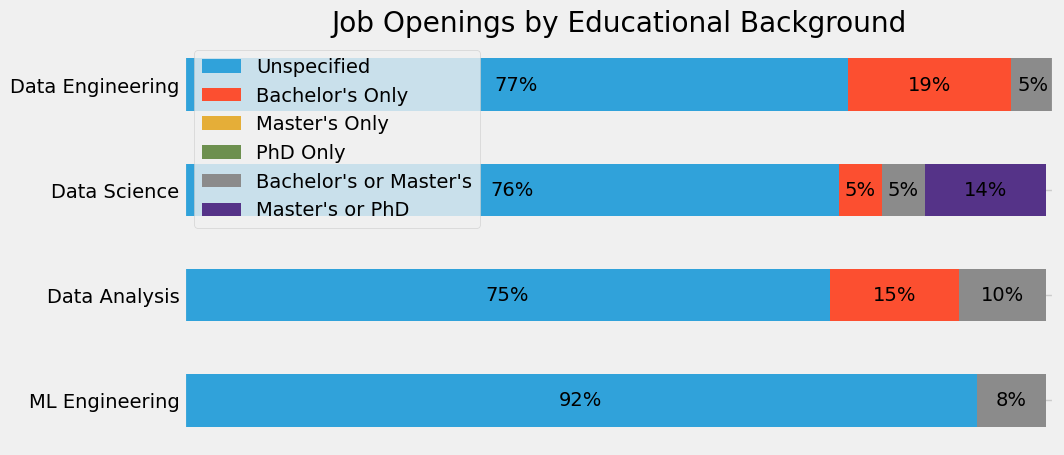

In [27]:
lists = [[de_unspecified, de_bsc_count, de_msc_count, de_phd_count, de_bsc_msc_count, de_msc_phd_count],
         [ds_unspecified, ds_bsc_count, ds_msc_count, ds_phd_count, ds_bsc_msc_count, ds_msc_phd_count],
         [da_unspecified, da_bsc_count, da_msc_count, da_phd_count, da_bsc_msc_count, da_msc_phd_count],
         [ml_unspecified, ml_bsc_count, ml_msc_count, ml_phd_count, ml_bsc_msc_count, ml_msc_phd_count]]

# Numbers were scaled to consider the varying numbers of available jobs for different professions
lists_sum = [sum(lst) for lst in lists]
scaling_factors = [1 / list_sum for list_sum in lists_sum]
scaled_lists = [[round(value * scaling_factor, 2) for value in lst] for lst, scaling_factor in zip(lists, scaling_factors)]

categories = ['Unspecified', 'Bachelor\'s Only', 'Master\'s Only', 'PhD Only',
              'Bachelor\'s or Master\'s', 'Master\'s or PhD']
percentages = {'Data Engineering': scaled_lists[0], 'Data Science': scaled_lists[1],
               'Data Analysis': scaled_lists[2], 'ML Engineering': scaled_lists[3]}

stack_hbar_plot(percentages, categories)
plt.title('Job Openings by Educational Background')
plt.legend(loc=0)
plt.show()

**The required educational background varies depending on the specific profession with the majority of job postings not specifying a particular degree. But generally, a bachelor's degree is sufficient for most jobs. Master's or PhD credentials provide little additional advantage depending on the position.**

In [28]:
# Which companies require a PhD and for what positions?

idxs = []
for idx, row in enumerate(ds_df.job_desc):
    for item in row:
        if item == 'ph.d.':
            idxs.append(idx)

ds_df.iloc[idxs][['company', 'job_title']]

,company,job_title
1,Flint Consulting Ltd,data scientist
369,Breadfast,staff data scientist
590,Flint Consulting Ltd,principal data scientist


Only a few companies in Egypt require a PhD for data professions, and it usually tend to be for higher-level positions.

### What are the most in-demand skills and tools?

In [29]:
def plot_wordcloud(df):
    desc_words = ' '.join(df.job_desc.apply(lambda x: ' '.join(x)))
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(desc_words)
    
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.margins(x=0, y=0)

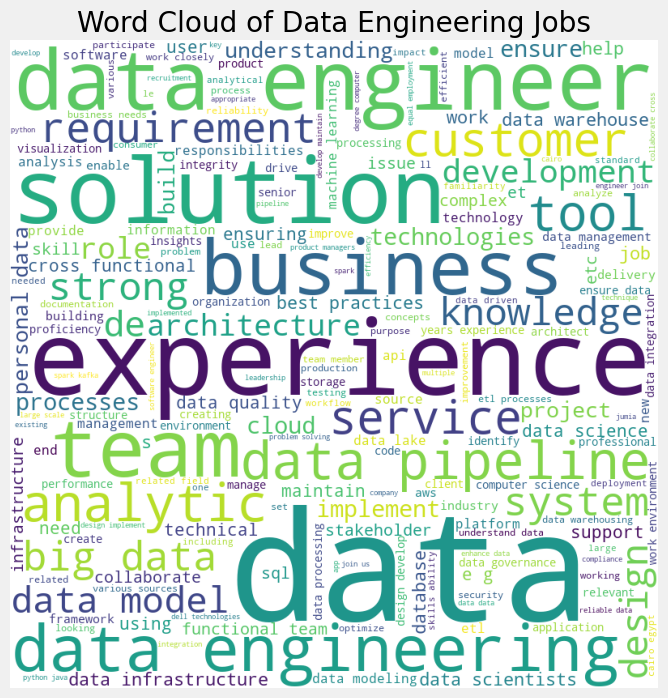

In [30]:
plot_wordcloud(de_df)
plt.title('Word Cloud of Data Engineering Jobs')
plt.show()

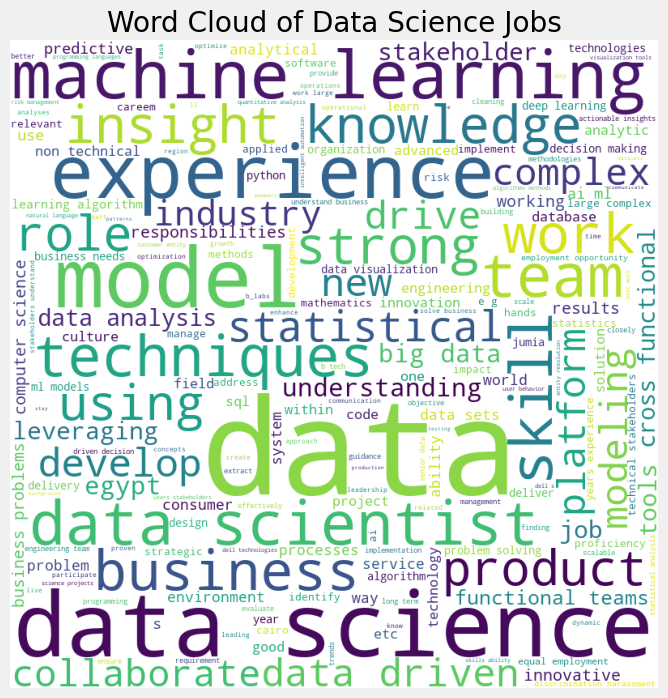

In [31]:
plot_wordcloud(ds_df)
plt.title('Word Cloud of Data Science Jobs')
plt.show()

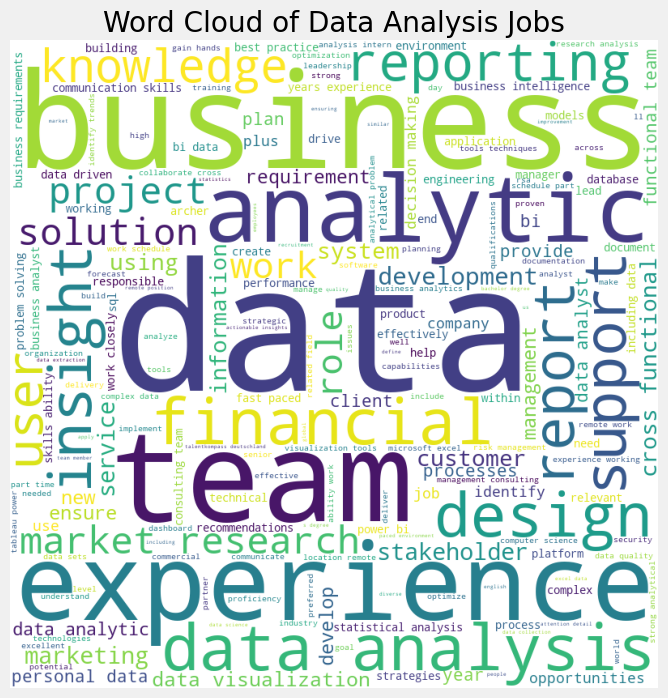

In [32]:
plot_wordcloud(da_df)
plt.title('Word Cloud of Data Analysis Jobs')
plt.show()

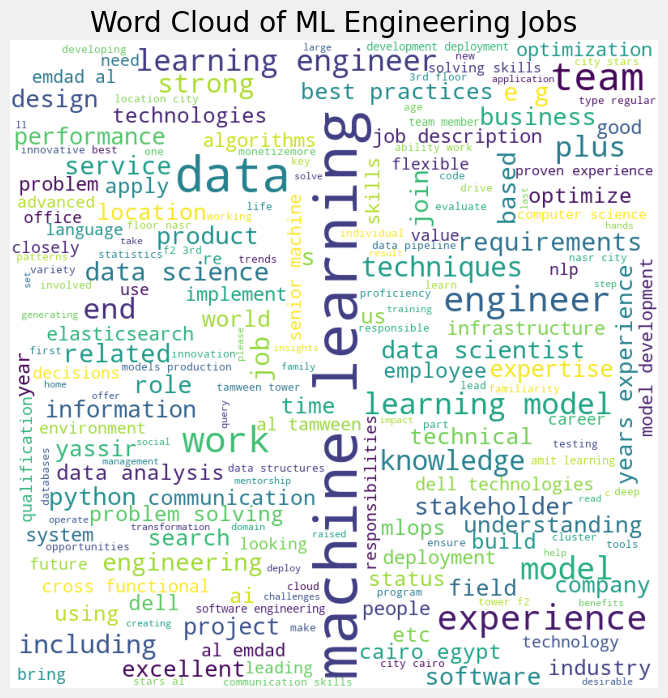

In [33]:
plot_wordcloud(ml_df)
plt.title('Word Cloud of ML Engineering Jobs')
plt.show()

We will continue with more detailed analysis of required skills and tools.

In [34]:
all_desc = [de_df.job_desc, ds_df.job_desc, da_df.job_desc, ml_df.job_desc]
all_job_desc = pd.concat(all_desc, axis=0)
all_desc_list = all_job_desc.explode().tolist()

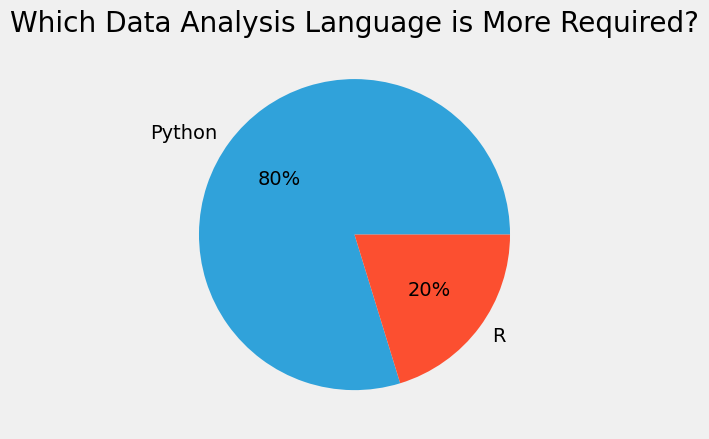

In [35]:
python_count = all_desc_list.count('python')
r_count = all_desc_list.count('r')

values = [python_count, r_count]
labels = ['Python', 'R']

plt.pie(values, labels=labels, autopct='%.0f%%')
plt.title('Which Data Analysis Language is More Required?')
plt.show()

**Python is by far the most in-demand data analysis language, though R maintains a niche.**

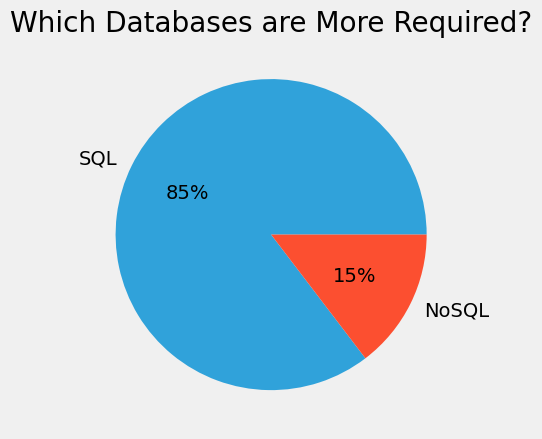

In [36]:
sql_count = all_desc_list.count('sql')
nosql_count = all_desc_list.count('nosql')

values = [sql_count, nosql_count]
labels = ['SQL', 'NoSQL']

plt.pie(values, labels=labels, autopct='%.0f%%')
plt.title('Which Databases are More Required?')
plt.show()

**SQL is the most required database for data professionals as they are used for managing relational data.**

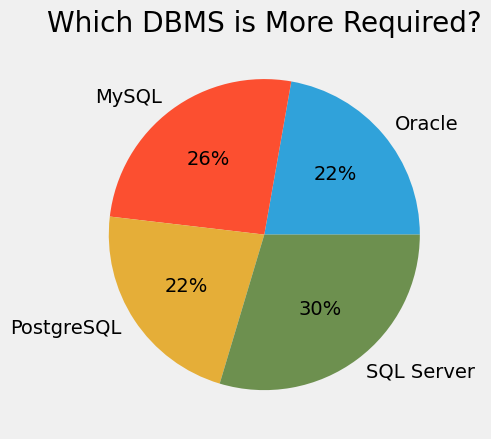

In [37]:
oracle_count = all_desc_list.count('oracle')
mysql_count = all_desc_list.count('mysql')
postgresql_count = all_desc_list.count('postgresql')
sqlserver_count = all_desc_list.count('server')

values = [oracle_count, mysql_count, postgresql_count, sqlserver_count]
labels = ['Oracle', 'MySQL', 'PostgreSQL', 'SQL Server']

plt.pie(values, labels=labels, autopct='%.0f%%')
plt.title('Which DBMS is More Required?')
plt.show()

**SQL Server has the highest demand, followed by MySQL, Oracle, and PostgreSQL. This suggests a diversity of database management systems being used in the job market.**

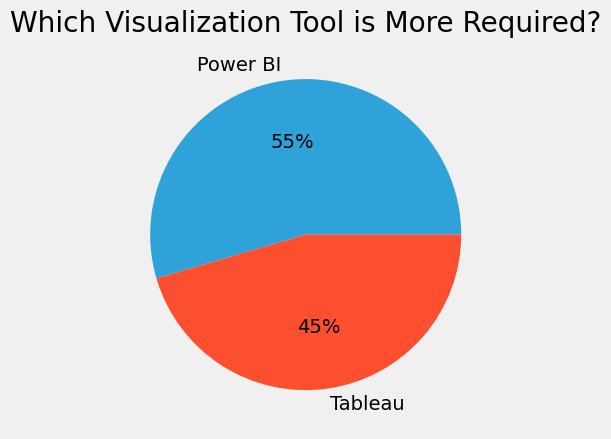

In [38]:
powerbi_count = all_desc_list.count('power') + all_desc_list.count('pbi')
tableau_count = all_desc_list.count('tableau')

values = [powerbi_count, tableau_count]
labels = ['Power BI', 'Tableau']

plt.pie(values, labels=labels, autopct='%.0f%%')
plt.title('Which Visualization Tool is More Required?')
plt.show()

**Power BI edges out Tableau for visualization with a narrow margin, indicating that proficiency in both tools could be valuable.**

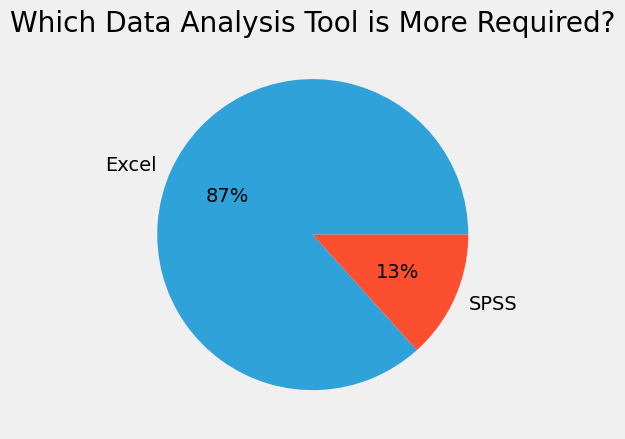

In [39]:
excel_count = all_desc_list.count('excel')
spss_count = all_desc_list.count('spss')

values = [excel_count, spss_count]
labels = ['Excel', 'SPSS']

plt.pie(values, labels=labels, autopct='%.0f%%')
plt.title('Which Data Analysis Tool is More Required?')
plt.show()

**Excel continues to be the leading analysis tool in the market.**

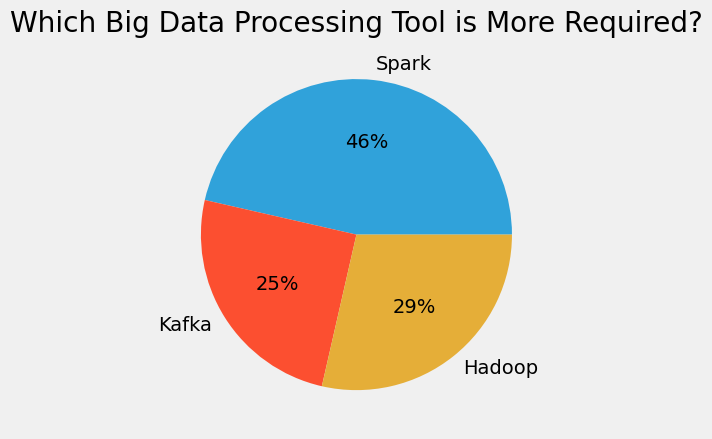

In [40]:
spark_count = all_desc_list.count('spark')
kafka_count = all_desc_list.count('kafka')
hadoop_count = all_desc_list.count('hadoop')

values = [spark_count, kafka_count, hadoop_count]
labels = ['Spark', 'Kafka', 'Hadoop']

plt.pie(values, labels=labels, autopct='%.0f%%')
plt.title('Which Big Data Processing Tool is More Required?')
plt.show()

**Spark is the most required big data processing tool. Hadoop and Kafka are also required for some jobs, but they are less common.**

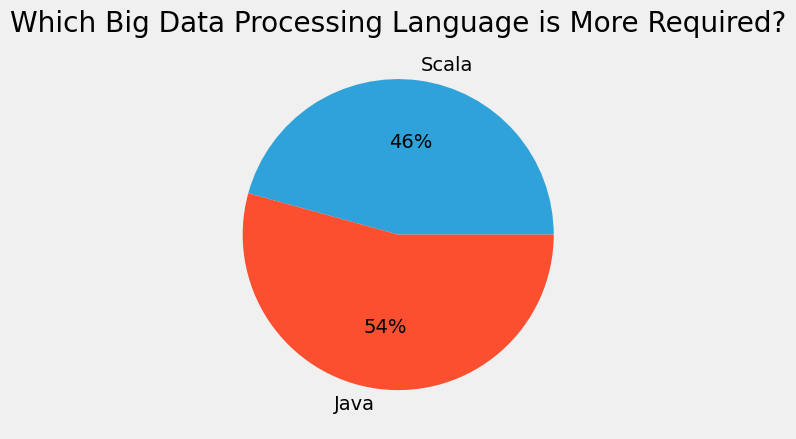

In [41]:
scala_count = all_desc_list.count('scala')
java_count = all_desc_list.count('java')

values = [scala_count, java_count]
labels = ['Scala', 'Java']

plt.pie(values, labels=labels, autopct='%.0f%%')
plt.title('Which Big Data Processing Language is More Required?')
plt.show()

**Java is slightly more required than Scala for big data processing.**

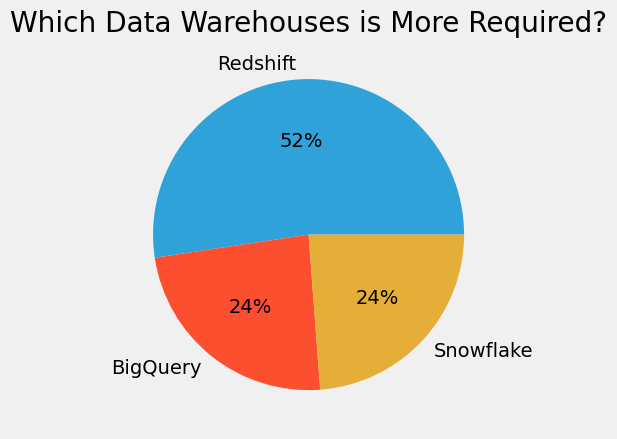

In [42]:
redshift_count = all_desc_list.count('redshift')
bigquery_count = all_desc_list.count('bigquery')
snowflake_count = all_desc_list.count('snowflake')

values = [redshift_count, bigquery_count, snowflake_count]
labels = ['Redshift', 'BigQuery', 'Snowflake']

plt.pie(values, labels=labels, autopct='%.0f%%')
plt.title('Which Data Warehouses is More Required?')
plt.show()

**Redshift is the most required data warehouse, indicating a preference for AWS-based solutions.**

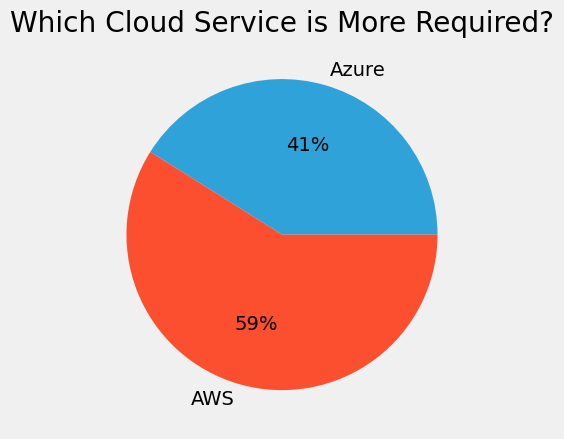

In [43]:
azure_count = all_desc_list.count('azure')
aws_count = all_desc_list.count('aws')

values = [azure_count, aws_count]
labels = ['Azure', 'AWS']

plt.pie(values, labels=labels, autopct='%.0f%%')
plt.title('Which Cloud Service is More Required?')
plt.show()

**AWS is more required compared to Azure, indicating that AWS skills are in higher demand in the market.**

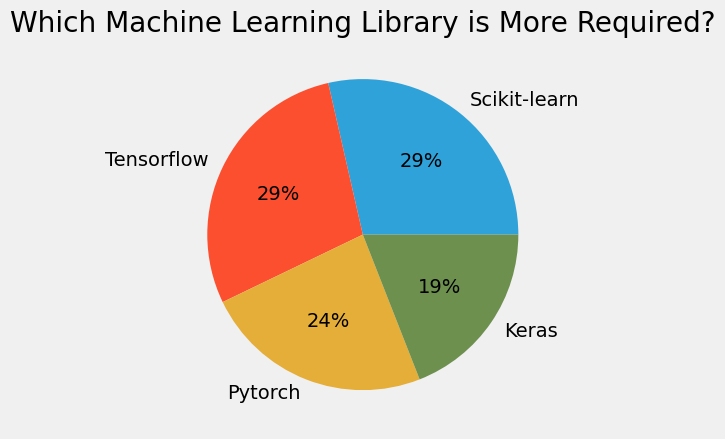

In [44]:
sklearn_count = all_desc_list.count('scikit-learn')
tflow_count = all_desc_list.count('tensorflow')
pytorch_count = all_desc_list.count('pytorch')
keras_count = all_desc_list.count('keras')

values = [sklearn_count, tflow_count, pytorch_count, keras_count]
labels = ['Scikit-learn', 'Tensorflow', 'Pytorch', 'Keras']

plt.pie(values, labels=labels, autopct='%.0f%%')
plt.title('Which Machine Learning Library is More Required?')
plt.show()

**Scikit-learn and TensorFlow are equally required, followed by PyTorch and Keras. This suggests a fairly balanced demand for different machine learning libraries.**

### Recommendations for Job Seekers:
**Depending on your data profession, you might consider the following:**
- Focus on Python and SQL: Master these languages as they are highly sought after.
- Excel Proficiency: Strong Excel skills are fundamental for data analysis roles.
- Data Visualization: Familiarize yourself with Power BI and Tableau.
- Big Data Skills: Acquire expertise in Apache Spark, Hadoop, and Kafka for big data processing roles.
- Cloud Services: Master AWS due to its leading position, and consider Azure for a well-rounded skill set.
- Consider Cairo: If possible, consider moving to Cairo, which has the most job opportunities in this field.